In [2]:
install.packages('h2o')

also installing the dependencies 'bitops', 'RCurl'




  There is a binary version available but the source version is later:
      binary   source needs_compilation
h2o 3.32.1.2 3.32.1.3             FALSE

package 'bitops' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Shrestha\AppData\Local\Temp\RtmpYFFady\downloaded_packages


installing the source package 'h2o'



In [7]:
library(h2o)
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         15 minutes 42 seconds 
    H2O cluster timezone:       Asia/Kolkata 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    27 days  
    H2O cluster name:           H2O_started_from_R_Shrestha_ems318 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.98 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 



In [8]:
# Import ECG train and test data into the H2O cluster
train_ecg <- h2o.importFile('ecg_discord_train.csv', header = FALSE)
test_ecg <- h2o.importFile('ecg_discord_test.csv', header = FALSE)


  |======================================================================| 100%
  |======================================================================| 100%


In [9]:
# Train deep autoencoder learning model on "normal". training data, y ignored 
anomaly_model <- h2o.deeplearning(
 x = names(train_ecg), 
 training_frame = train_ecg, 
 activation = "Tanh", 
 autoencoder = TRUE, 
 hidden = c(50,20,50), 
 sparse = TRUE,
 l1 = 1e-4, 
 epochs = 100)


  |======================================================================| 100%


In [10]:
# detection app (MSE between output and input layers)
recon_error <- h2o.anomaly(anomaly_model, test_ecg)


Reconstruction.MSE
0.8002445
0.9014907
0.9353564
0.8330189
0.8514618
0.8898378
0.8333144
1.0150933
0.9668851
0.9662630


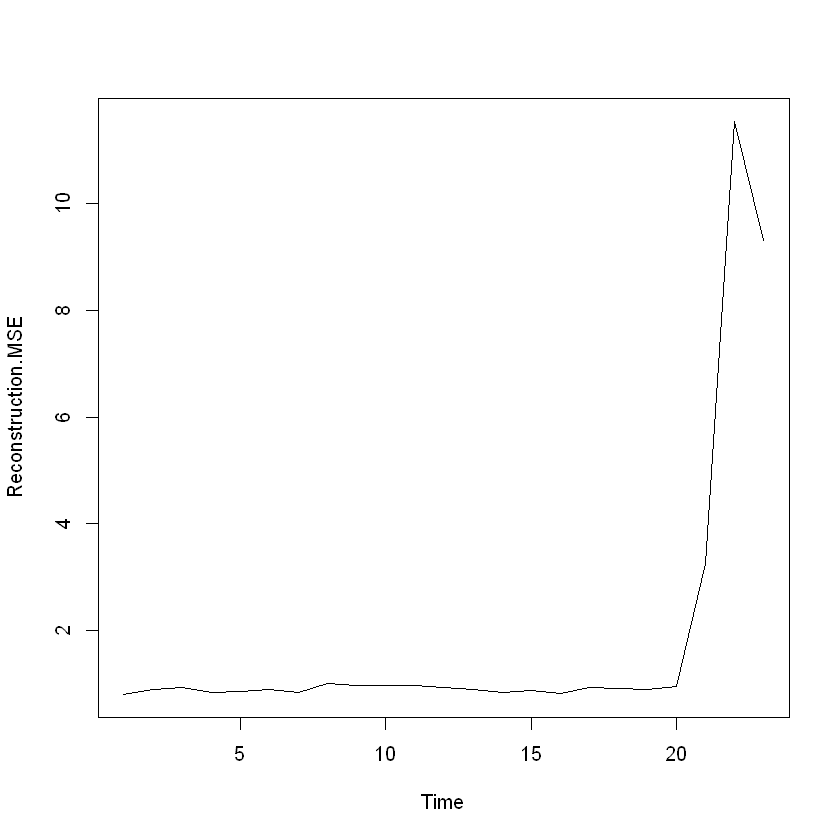

In [11]:
# Pull reconstruction error data and plot to find outliers(last 3 heartbeats)
recon_error <- as.data.frame(recon_error)
recon_error
plot.ts(recon_error)


In [13]:
# Note: Testing = Reconstructing the test dataset
test_recon <- h2o.predict(anomaly_model, test_ecg) 
head(test_recon)
h2o.saveModel(anomaly_model,'anomaly_model.bin')


  |======================================================================| 100%


reconstr_C1,reconstr_C2,reconstr_C3,reconstr_C4,reconstr_C5,reconstr_C6,reconstr_C7,reconstr_C8,reconstr_C9,reconstr_C10,...,reconstr_C191,reconstr_C192,reconstr_C193,reconstr_C194,reconstr_C195,reconstr_C196,reconstr_C197,reconstr_C198,reconstr_C199,reconstr_C200
4.841346,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734759,8.800924,8.872364,8.911355,8.938552,8.938376,8.962259,9.016065
4.841152,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734759,8.800923,8.872360,8.911351,8.938535,8.938359,8.962220,9.016036
4.841290,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734759,8.800924,8.872362,8.911353,8.938542,8.938366,8.962237,9.016049
4.841366,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734759,8.800925,8.872364,8.911355,8.938556,8.938381,8.962269,9.016072
4.841370,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734759,8.800925,8.872364,8.911355,8.938553,8.938378,8.962263,9.016068
4.841332,9.7485,9.8145,9.912,9.9875,10.027,10.1,10.158,10.1985,10.2355,...,8.636493,8.667988,8.734758,8.800922,8.872358,8.911350,8.938529,8.938352,8.962199,9.016025


[1] "C:\\Users\\Shrestha\\transformer\\Research\\R_practice\\anomaly_model.bin\\DeepLearning_model_R_1623829791449_1"

In [14]:
h2o.download_pojo(anomaly_model, "C:\\Users\\Shrestha\\transformer\\Research\\R_practice\\", get_jar = TRUE)

ERROR: Error in h2o.download_pojo(anomaly_model, "C:\\Users\\Shrestha\\transformer\\Research\\R_practice\\", : 'path',C:\Users\Shrestha\transformer\Research\R_practice\, to save pojo cannot be found.
